In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb

In [3]:
#Read Data

In [4]:
data=pd.read_csv('bank-marketing.csv')

In [5]:
data.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [5]:
data.shape[0]

45211

In [6]:
data.shape[1]

23

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [8]:
#In this data, we have 10 columns that are int64 and 13 columns that are
#object.

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
age group,45211.0,3.645861,1.083271,1.0,3.0,3.0,4.0,9.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
response,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


From this five point summary, we can know about mean,median (ie) standard deviation, at 25% of the data the values are listed for all numerical columns, at 50% of the data the values are listed for all numerical columns, at 75% of the data the values are listed for all numerical columns, Minimum and Maximum of each column are also listed.

In this dataset, We can see that the salary feature has min value as 0;
It is unusual to see that salary value is given as 0.It is a potential outlier where the person could either be any of this a jobless person,a home maker,or a student.This could be the case here.

And, In the Balance feature there is a record of negative balance, the possiblities can be the person may have inactive account, or the person
might have no savings.

In [10]:
data[data['salary']==0].head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
216,47,4,Y,unknown,0,married,unknown,married-unknown,no,no,...,unknown,5,may,338,2,-1,0,unknown,no,0
354,59,5,Y,unknown,0,divorced,unknown,divorced-unknown,no,no,...,unknown,5,may,347,3,-1,0,unknown,no,0
876,37,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,7,may,131,1,-1,0,unknown,no,0
1072,29,2,Y,unknown,0,single,primary,single-primary,yes,no,...,unknown,7,may,50,2,-1,0,unknown,no,0


Here, we can see that where salary is 0 the job is unknown and the education mostly are unknown.

In [11]:
for i in data.columns:
    print(i)
    print(data[i].nunique())
    print()

age
77

age group
9

eligible
2

job
12

salary
11

marital
3

education
4

marital-education
12

targeted
2

default
2

balance
7168

housing
2

loan
2

contact
3

day
31

month
12

duration
1573

campaign
48

pdays
559

previous
41

poutcome
4

y
2

response
2



In [8]:
data_used=data.drop(['y','response'],1)

In [9]:
data_used.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,no,no,unknown,5,may,198,1,-1,0,unknown


In [10]:
data_used['age group']=data_used['age group'].astype('object')

In [11]:
numerical_data=data_used.select_dtypes(include=np.number)

In [12]:
numerical_data.head()

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
3,47,20000,1506,5,92,1,-1,0
4,33,0,1,5,198,1,-1,0


In [13]:
categorical_data=data_used.select_dtypes(include=np.object)

In [14]:
categorical_data.head()

,age group,eligible,job,marital,education,marital-education,targeted,default,housing,loan,contact,month,poutcome
0,5,Y,management,married,tertiary,married-tertiary,yes,no,yes,no,unknown,may,unknown
1,4,Y,technician,single,secondary,single-secondary,yes,no,yes,no,unknown,may,unknown
2,3,Y,entrepreneur,married,secondary,married-secondary,yes,no,yes,yes,unknown,may,unknown
3,4,Y,blue-collar,married,unknown,married-unknown,no,no,yes,no,unknown,may,unknown
4,3,Y,unknown,single,unknown,single-unknown,no,no,no,no,unknown,may,unknown


In [19]:
import warnings
warnings.filterwarnings('ignore')

**UNIVARIATE ANALYSIS**

**Numerical Features**

<AxesSubplot:xlabel='previous', ylabel='Density'>

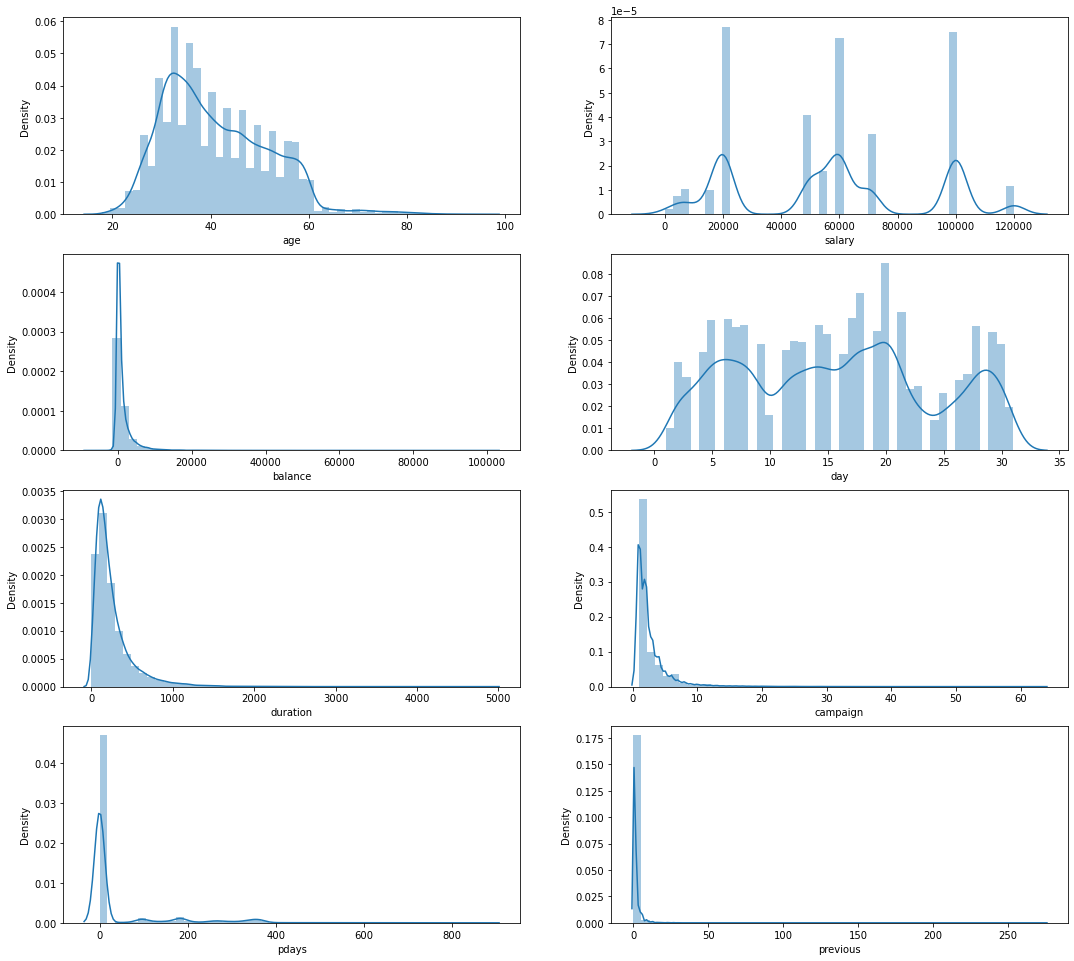

In [20]:
mp.figure(figsize=(18,21))

mp.subplot(5,2,1)

sb.distplot(numerical_data['age'],kde=True)

mp.subplot(5,2,2)

sb.distplot(numerical_data['salary'],kde=True)

mp.subplot(5,2,3)

sb.distplot(numerical_data['balance'],kde=True)

mp.subplot(5,2,4)

sb.distplot(numerical_data['day'],kde=True)

mp.subplot(5,2,5)

sb.distplot(numerical_data['duration'],kde=True)

mp.subplot(5,2,6)

sb.distplot(numerical_data['campaign'],kde=True)

mp.subplot(5,2,7)

sb.distplot(numerical_data['pdays'],kde=True)

mp.subplot(5,2,8)

sb.distplot(numerical_data['previous'],kde=True)

In [21]:
numerical_data.skew()

age          0.684818
salary       0.137829
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

**Age --> Very lightly skewed**

**Balance --> It is positively skewed**

**Duration --> It is positively skewed**

**Campaign --> It is positively skewed**

**pdays --> It is positively skewed**

**previous --> It is heavily positive skewed**

**These columns have outliers we can plot boxplot to know the info about
columns**

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='campaign', ylabel='Density'>

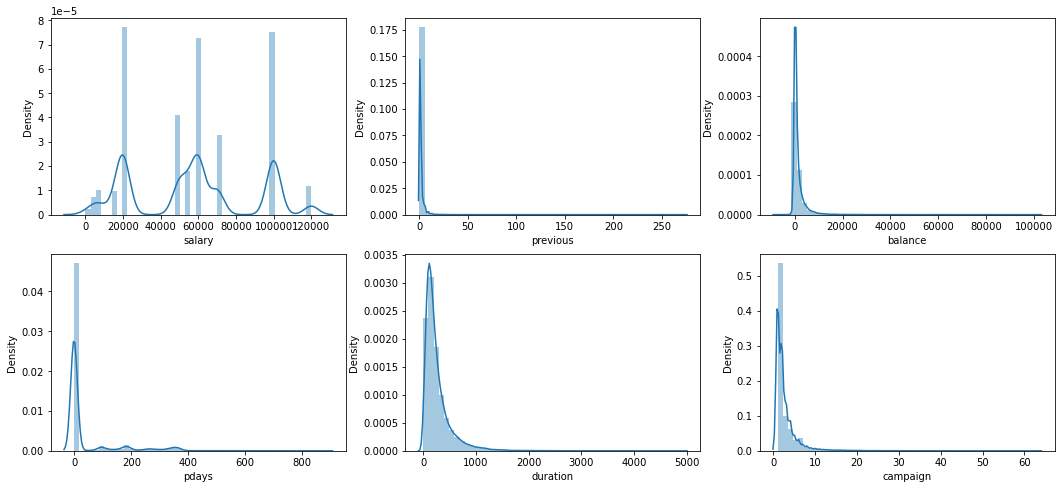

In [18]:
mp.figure(figsize=(18,21))

mp.subplot(5,3,1)

sb.distplot(numerical_data['salary'])

mp.subplot(5,3,2)

sb.distplot(numerical_data['previous'])

mp.subplot(5,3,3)

sb.distplot(numerical_data['balance'])

mp.subplot(5,3,4)

sb.distplot(numerical_data['pdays'])

mp.subplot(5,3,5)

sb.distplot(numerical_data['duration'])

mp.subplot(5,3,6)

sb.distplot(numerical_data['campaign'])

<AxesSubplot:xlabel='previous'>

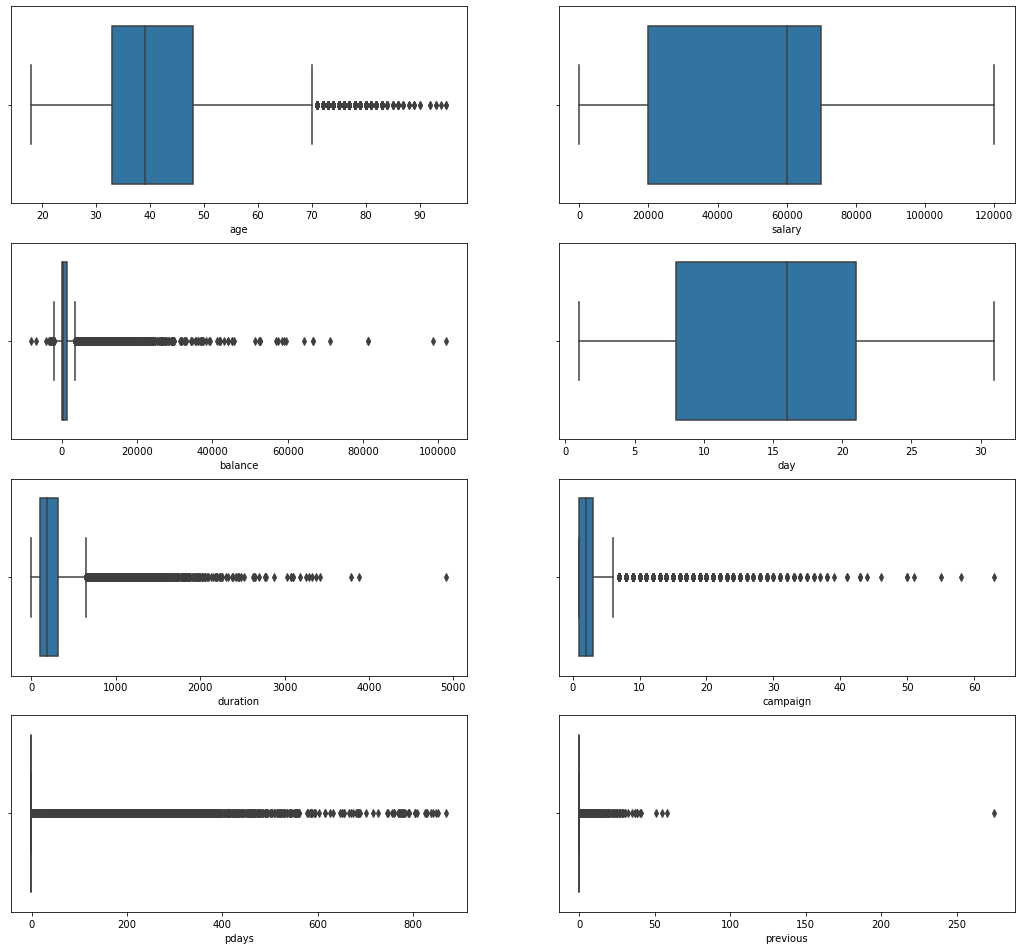

In [22]:
mp.figure(figsize=(18,21))

mp.subplot(5,2,1)

sb.boxplot(numerical_data['age'])

mp.subplot(5,2,2)

sb.boxplot(numerical_data['salary'])

mp.subplot(5,2,3)

sb.boxplot(numerical_data['balance'])

mp.subplot(5,2,4)

sb.boxplot(numerical_data['day'])

mp.subplot(5,2,5)

sb.boxplot(numerical_data['duration'])

mp.subplot(5,2,6)

sb.boxplot(numerical_data['campaign'])

mp.subplot(5,2,7)

sb.boxplot(numerical_data['pdays'])

mp.subplot(5,2,8)

sb.boxplot(numerical_data['previous'])

We can see the whisker limit and median value for each columns

We should treat outliers by transforming with right techniques inorder not to lose the rows

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-p

<AxesSubplot:xlabel='age group', ylabel='count'>

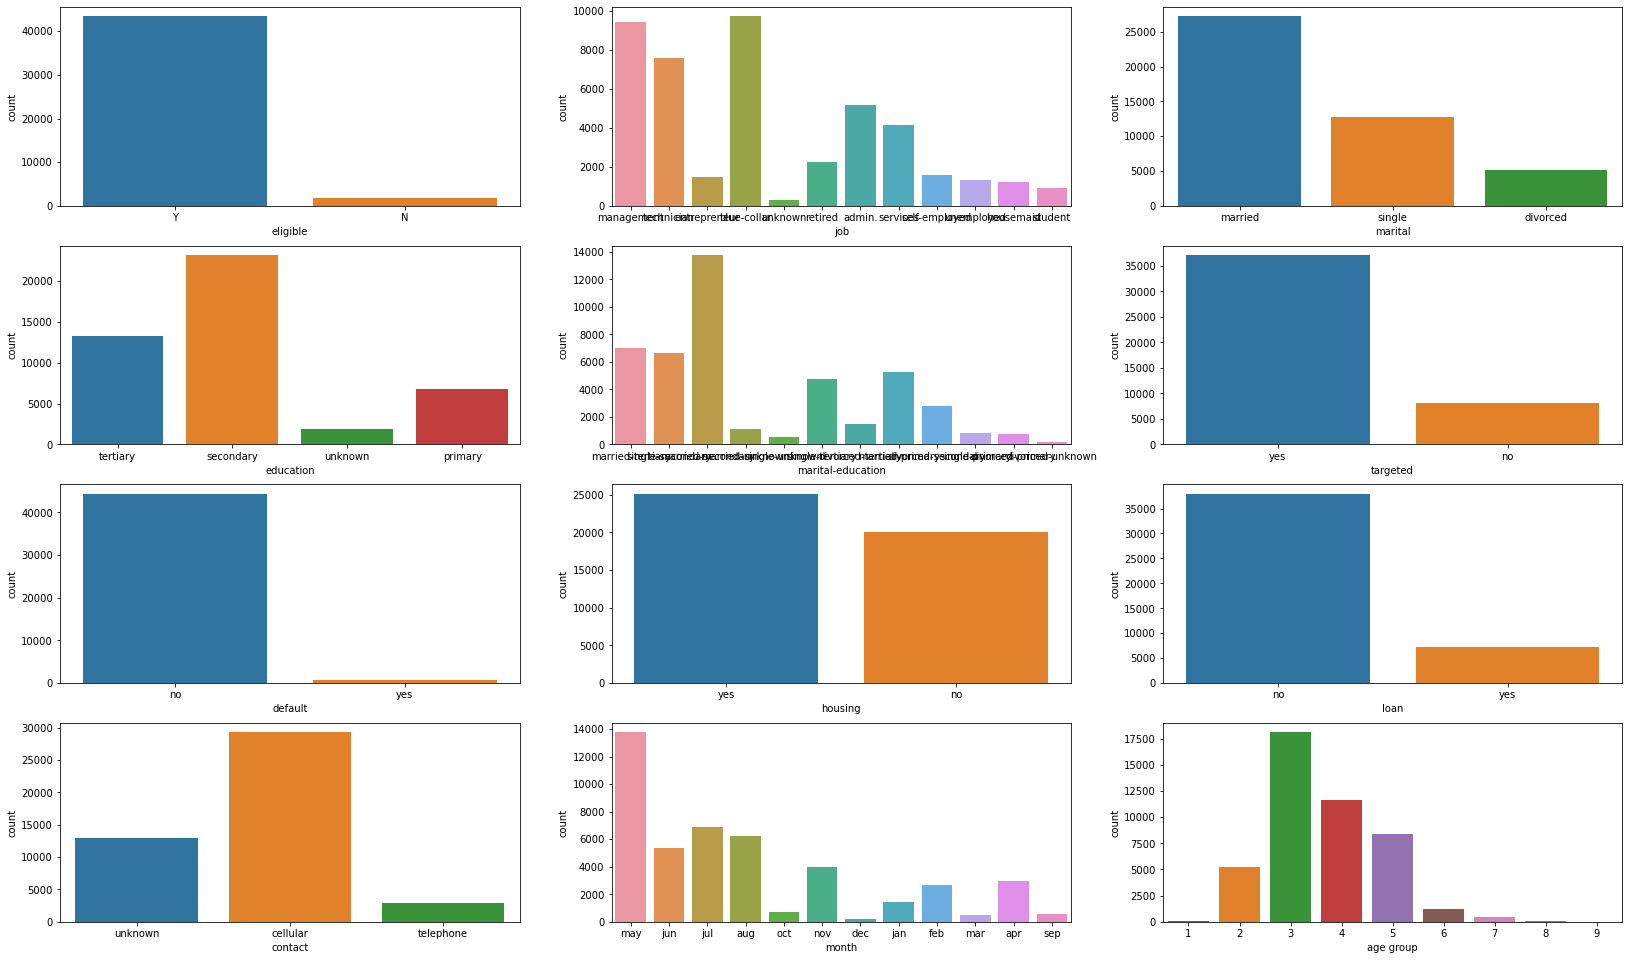

In [19]:
mp.figure(figsize=(28,30))

mp.subplot(7,3,1)

sb.countplot(categorical_data['eligible'])

mp.subplot(7,3,2)

sb.countplot(categorical_data['job'])

mp.subplot(7,3,3)

sb.countplot(categorical_data['marital'])

mp.subplot(7,3,4)

sb.countplot(categorical_data['education'])

mp.subplot(7,3,5)

sb.countplot(categorical_data['marital-education'])

mp.subplot(7,3,6)

sb.countplot(categorical_data['targeted'])

mp.subplot(7,3,7)

sb.countplot(categorical_data['default'])

mp.subplot(7,3,8)

sb.countplot(categorical_data['housing'])

mp.subplot(7,3,9)

sb.countplot(categorical_data['loan'])

mp.subplot(7,3,10)

sb.countplot(categorical_data['contact'])

mp.subplot(7,3,11)

sb.countplot(categorical_data['month'])

mp.subplot(7,3,12)

sb.countplot(categorical_data['age group'])

<AxesSubplot:xlabel='age group', ylabel='count'>

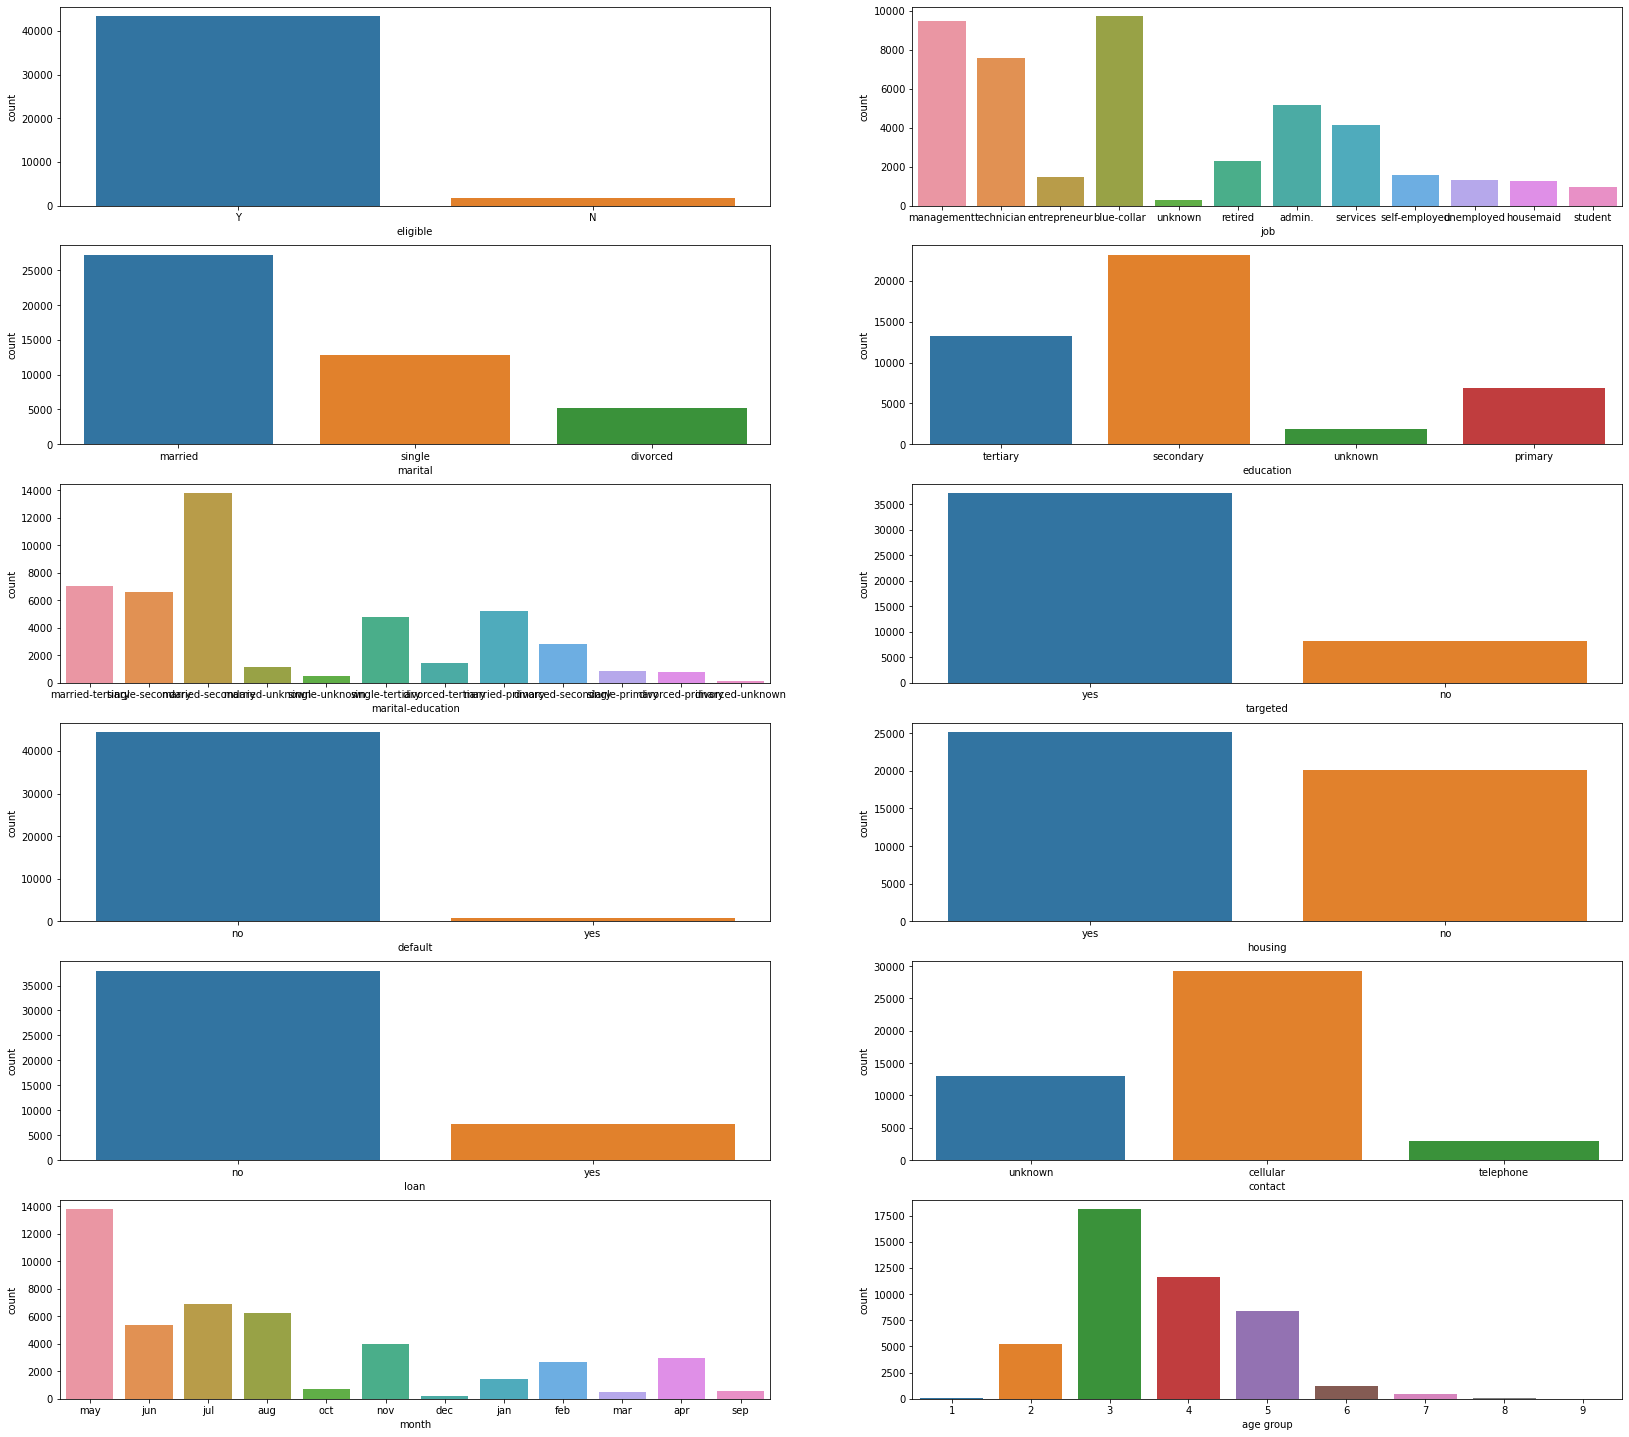

In [23]:
mp.figure(figsize=(28,30))

mp.subplot(7,2,1)

sb.countplot(categorical_data['eligible'])

mp.subplot(7,2,2)

sb.countplot(categorical_data['job'])

mp.subplot(7,2,3)

sb.countplot(categorical_data['marital'])

mp.subplot(7,2,4)

sb.countplot(categorical_data['education'])

mp.subplot(7,2,5)

sb.countplot(categorical_data['marital-education'])

mp.subplot(7,2,6)

sb.countplot(categorical_data['targeted'])

mp.subplot(7,2,7)

sb.countplot(categorical_data['default'])

mp.subplot(7,2,8)

sb.countplot(categorical_data['housing'])

mp.subplot(7,2,9)

sb.countplot(categorical_data['loan'])

mp.subplot(7,2,10)

sb.countplot(categorical_data['contact'])

mp.subplot(7,2,11)

sb.countplot(categorical_data['month'])

mp.subplot(7,2,12)

sb.countplot(categorical_data['age group'])

We can determine the count of each category 

Here in features like Job,Education,Marital Education,Contact has unknown category which must be changed as it is null values.

**BIVARIATE ANALYSIS**

<AxesSubplot:xlabel='previous', ylabel='y'>

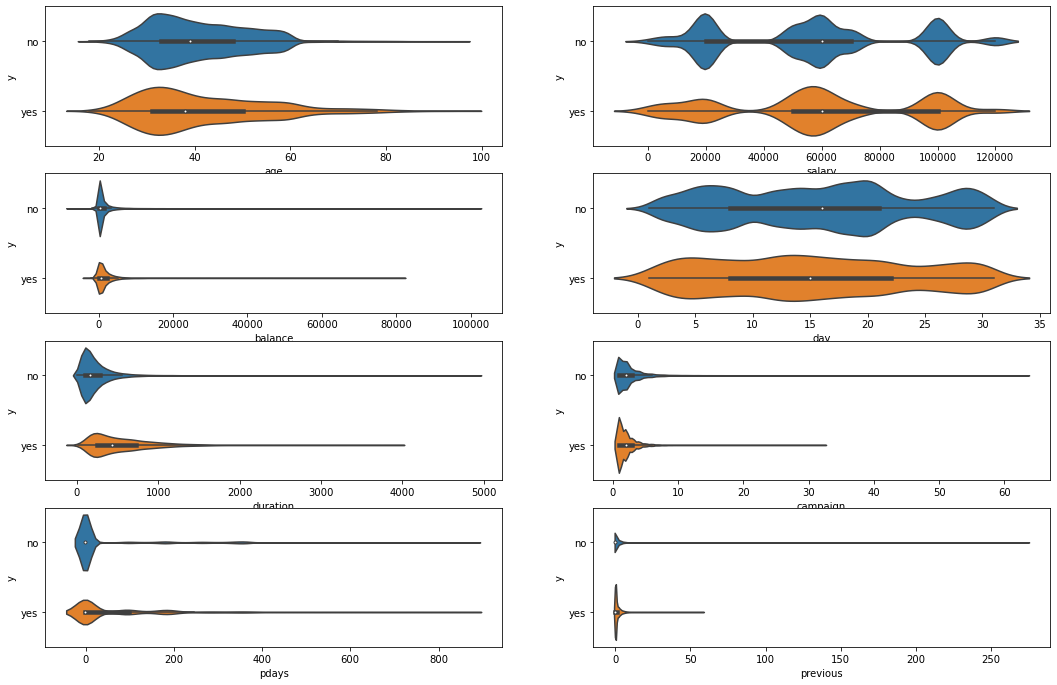

In [24]:
mp.figure(figsize=(18,21))

mp.subplot(7,2,1)

sb.violinplot(numerical_data['age'],data['y'])

mp.subplot(7,2,2)

sb.violinplot(numerical_data['salary'],data['y'])

mp.subplot(7,2,3)

sb.violinplot(numerical_data['balance'],data['y'])

mp.subplot(7,2,4)

sb.violinplot(numerical_data['day'],data['y'])

mp.subplot(7,2,5)

sb.violinplot(numerical_data['duration'],data['y'])

mp.subplot(7,2,6)

sb.violinplot(numerical_data['campaign'],data['y'])

mp.subplot(7,2,7)

sb.violinplot(numerical_data['pdays'],data['y'])

mp.subplot(7,2,8)

sb.violinplot(numerical_data['previous'],data['y'])


In Bivariate Analysis,here we plot numerical columns with target y for determining the distribution and skewness

We can see that,

age feature is slight positively skewed with no. 

age feature is slight positively skewed with yes. 

balance- target('no') highly positive skewed.

balance- target('yes') highly positive skewed.

duration- target('no') highly positive skewed.

duration- target('yes') highly positive skewed.

campaign- target('no') highly positive skewed.

campaign- target('yes') highly positive skewed.

pdays- target('no') highly positive skewed.

pdays- target('yes') highly positive skewed.

previews- target('no') highly positive skewed.

previous- target('yes') highly positive skewed.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-p

<AxesSubplot:xlabel='age group', ylabel='count'>

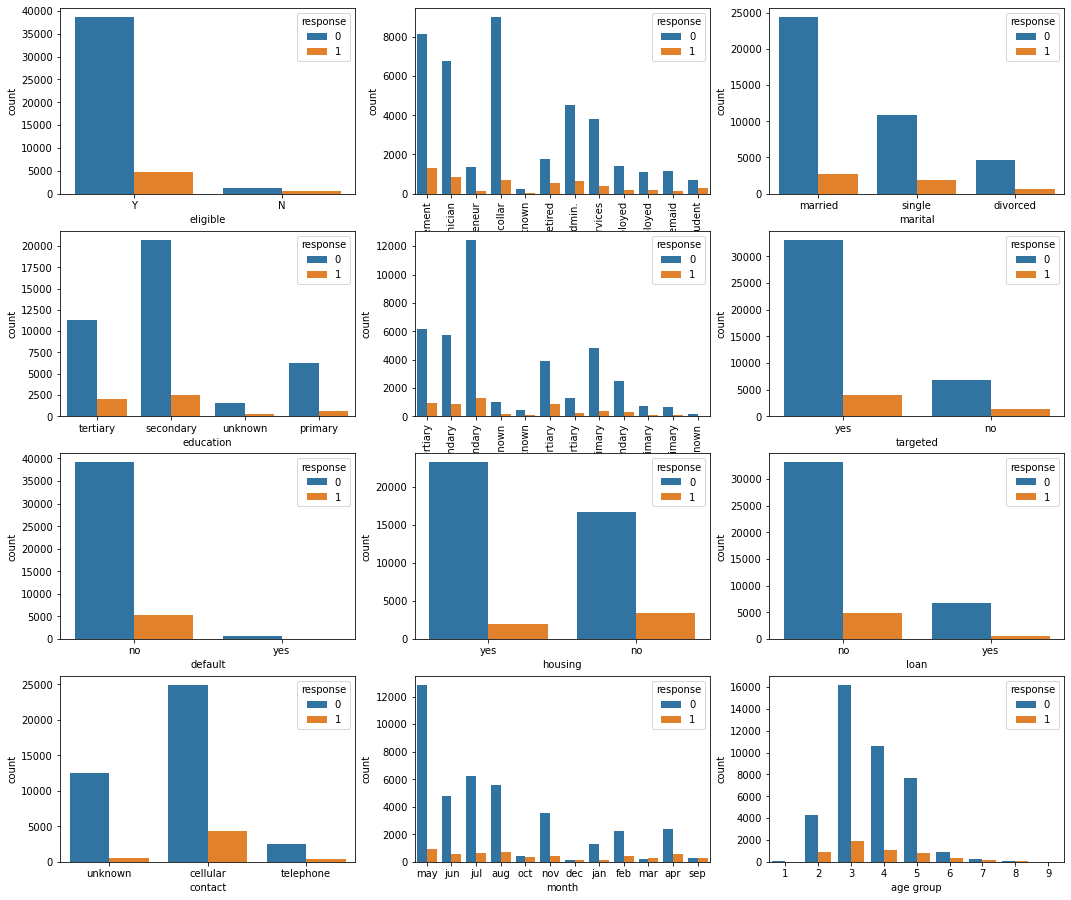

In [20]:
mp.figure(figsize=(18,28))

mp.subplot(7,3,1)

sb.countplot(categorical_data['eligible'],hue=data['response'])

mp.subplot(7,3,2)

sb.countplot(categorical_data['job'],hue=data['response'])
mp.xticks(rotation=90)

mp.subplot(7,3,3)

sb.countplot(categorical_data['marital'],hue=data['response'])

mp.subplot(7,3,4)

sb.countplot(categorical_data['education'],hue=data['response'])

mp.subplot(7,3,5)

sb.countplot(categorical_data['marital-education'],hue=data['response'])
mp.xticks(rotation=90)

mp.subplot(7,3,6)

sb.countplot(categorical_data['targeted'],hue=data['response'])

mp.subplot(7,3,7)

sb.countplot(categorical_data['default'],hue=data['response'])

mp.subplot(7,3,8)

sb.countplot(categorical_data['housing'],hue=data['response'])

mp.subplot(7,3,9)

sb.countplot(categorical_data['loan'],hue=data['response'])

mp.subplot(7,3,10)

sb.countplot(categorical_data['contact'],hue=data['response'])

mp.subplot(7,3,11)

sb.countplot(categorical_data['month'],hue=data['response'])

mp.subplot(7,3,12)

sb.countplot(categorical_data['age group'],hue=data['response'])


With this plot ,we can see the count of each target class with respect to each column.

Here also we could see the unknown column.So,we should change that to Nan.

We can see that 'No' of the target is always high.

It is heavily imbalanced.

**MULTIVARIATE ANALYSIS**

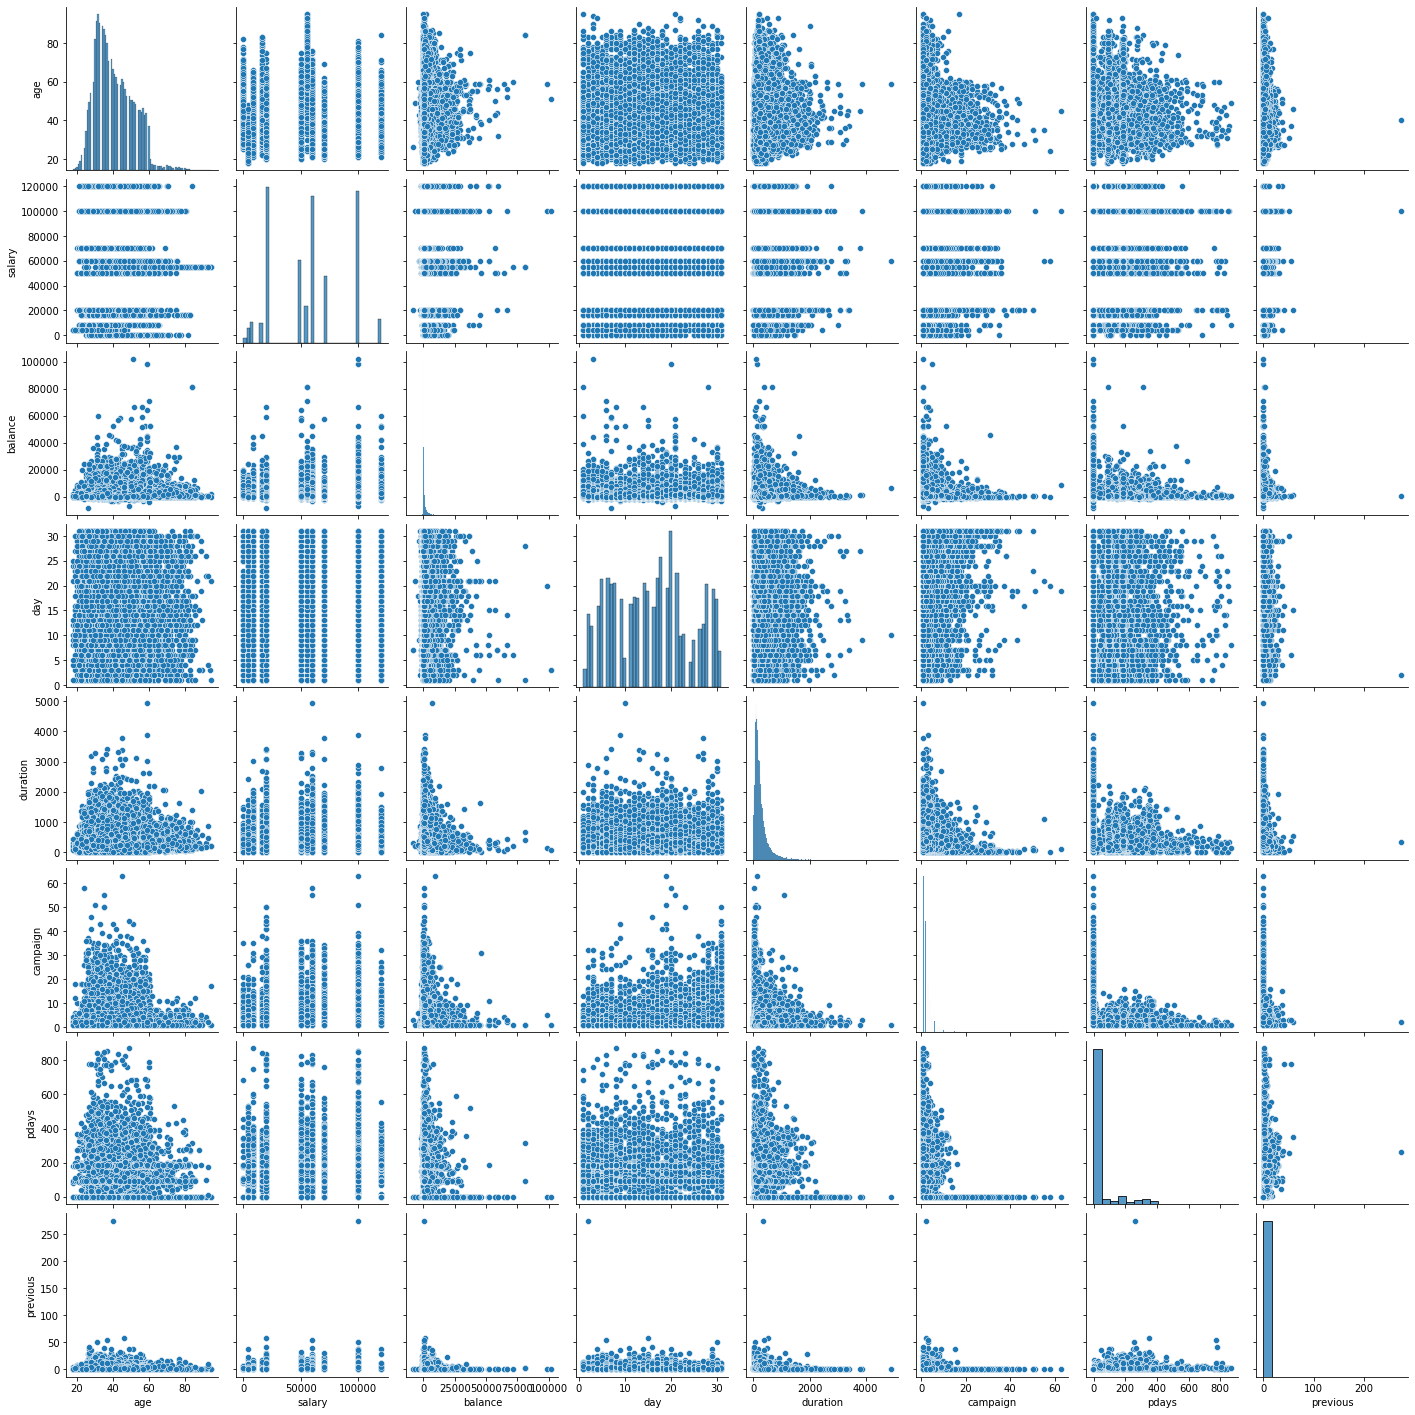

In [26]:
sb.pairplot(numerical_data)

There is no linear relationship between any numeric features

**Null Values Detection**

In [27]:
data_used.isnull().sum()

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
dtype: int64

There is no null values but it is in the form of unknown values as we analysed with plots.

In [28]:
data_used=data_used.replace({'unknown':np.nan})

We have now replaced unknown with Nan 

In [29]:
(data_used.isnull().sum()*100/len(data))[data_used.isnull().sum()*100/len(data) > 0]

job           0.637013
education     4.107407
contact      28.798301
poutcome     81.747805
dtype: float64

**'poutcome' ---> Has Null values above 80%**

We cannot treat null values which is above 80% 

So, We should drop the column we don't even have other option

In [30]:
data_used=data_used.drop('poutcome',1)

In [31]:
data_used[data_used['contact'].isna()]

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,2143,yes,no,NaN,5,may,261,1,-1,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,29,yes,no,NaN,5,may,151,1,-1,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,2,yes,yes,NaN,5,may,76,1,-1,0
3,47,4,Y,blue-collar,20000,married,NaN,married-unknown,no,no,1506,yes,no,NaN,5,may,92,1,-1,0
4,33,3,Y,NaN,0,single,NaN,single-unknown,no,no,1,no,no,NaN,5,may,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,3,Y,self-employed,60000,single,secondary,single-secondary,yes,no,1031,no,no,NaN,20,oct,7,1,-1,0
45062,58,5,Y,retired,55000,married,primary,married-primary,yes,no,742,no,no,NaN,20,oct,5,1,-1,0
45122,40,4,Y,entrepreneur,120000,single,tertiary,single-tertiary,no,no,262,yes,yes,NaN,26,oct,17,1,-1,0
45135,53,5,Y,blue-collar,20000,married,primary,married-primary,yes,no,1294,no,no,NaN,28,oct,71,1,-1,0


In [32]:
#Contact has null values for above 13k rows

In [33]:
data_used['contact'].dtypes

dtype('O')

For Object Datatype - Contact --> We can do replace null with mode

In [34]:
data_used['contact'].fillna(data_used['contact'].mode()[0],inplace=True)

In [35]:
data_used['education'].dtypes

dtype('O')

For Object Datatype - Education --> We can do replace null with mode

In [36]:
data_used['education'].fillna(data_used['education'].mode()[0],inplace=True)

In [37]:
data_used['job'].dtypes

dtype('O')

For Object Datatype - Job --> We can do replace null with mode

In [38]:
data_used['job'].fillna(data_used['job'].mode()[0],inplace=True)

**Encoding**

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [41]:
data_used[categorical_data.columns]=categorical_data.apply(LabelEncoder().fit_transform)

In [42]:
data_used.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,4,100000,1,2,6,1,0,...,1,0,2,5,8,261,1,-1,0,3
1,44,3,1,9,60000,2,1,9,1,0,...,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,2,120000,1,1,5,1,0,...,1,1,2,5,8,76,1,-1,0,3
3,47,3,1,1,20000,1,3,7,0,0,...,1,0,2,5,8,92,1,-1,0,3
4,33,2,1,11,0,2,3,11,0,0,...,0,0,2,5,8,198,1,-1,0,3


**TARGET VARIABLE**

In [43]:
data[['y','response']].tail()

,y,response
45206,yes,1
45207,yes,1
45208,yes,1
45209,no,0
45210,no,0


<AxesSubplot:xlabel='response', ylabel='count'>

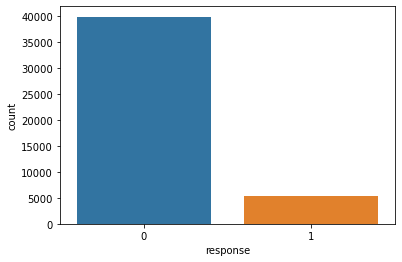

In [44]:
sb.countplot(data['response'])

We can see the dataset has target which is heavily imbalanced.

**Class imbalance and its treatment**

As we have already seen out target variable is heavily imbalanced

We can use OverSampling methods to treat imbalance in the data

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
data_used[categorical_data.columns]=data_used[categorical_data.columns].astype(int)

In [47]:
x=data_used
y=pd.DataFrame(data['response'])

In [48]:
data_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   age group          45211 non-null  int32
 2   eligible           45211 non-null  int32
 3   job                45211 non-null  int32
 4   salary             45211 non-null  int64
 5   marital            45211 non-null  int32
 6   education          45211 non-null  int32
 7   marital-education  45211 non-null  int32
 8   targeted           45211 non-null  int32
 9   default            45211 non-null  int32
 10  balance            45211 non-null  int64
 11  housing            45211 non-null  int32
 12  loan               45211 non-null  int32
 13  contact            45211 non-null  int32
 14  day                45211 non-null  int64
 15  month              45211 non-null  int32
 16  duration           45211 non-null  int64
 17  campaign    

In [49]:
sm=SMOTE(sampling_strategy=0.6)

In [50]:
x_sm,y_sm=sm.fit_resample(x,y)

In [51]:
y_sm.value_counts()

response
0           39922
1           23953
dtype: int64

In [52]:
y_sm.value_counts()*100/len(y_sm)

response
0           62.500196
1           37.499804
dtype: float64

In [53]:
#Balanced data

In [54]:
data_balanced=pd.concat([x_sm,y_sm],1)

In [55]:
data_balanced.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,4,1,4,100000,1,2,6,1,0,...,0,2,5,8,261,1,-1,0,3,0
1,44,3,1,9,60000,2,1,9,1,0,...,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,2,120000,1,1,5,1,0,...,1,2,5,8,76,1,-1,0,3,0
3,47,3,1,1,20000,1,3,7,0,0,...,0,2,5,8,92,1,-1,0,3,0
4,33,2,1,11,0,2,3,11,0,0,...,0,2,5,8,198,1,-1,0,3,0


**Transformation**

In [56]:
numerical_data.skew()

age          0.684818
salary       0.137829
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [57]:
#data_balanced['balance']=(data_balanced['balance'])**2

In [58]:
#data_used['duration']=(data_used['duration'])**2

In [59]:
#data_used['campaign']=np.exp(data_used['campaign'])

In [60]:
#data_used['previous']=(data_used['previous'])**2

In [61]:
#data_balanced[numerical_data.columns].skew()

In [62]:
#We can see that skewness has been reduced

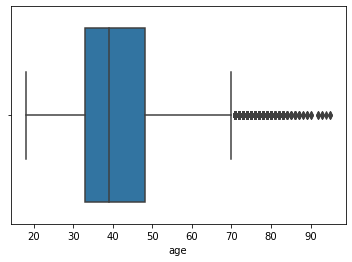

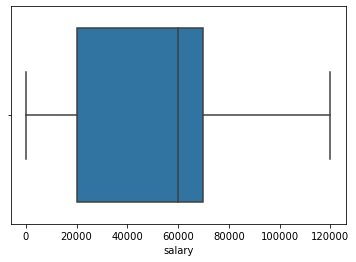

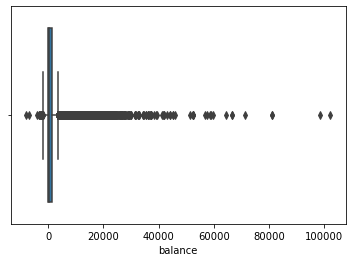

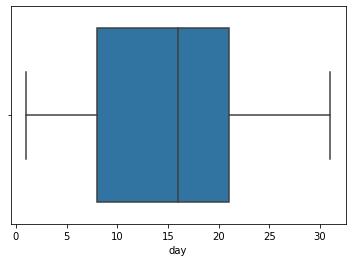

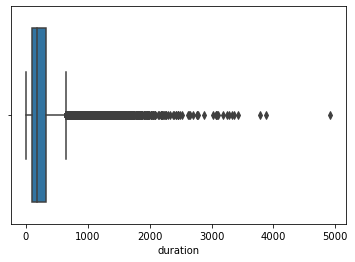

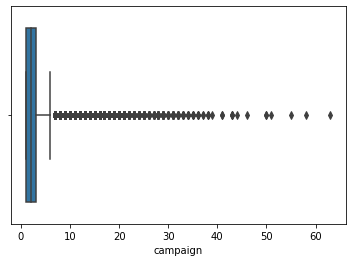

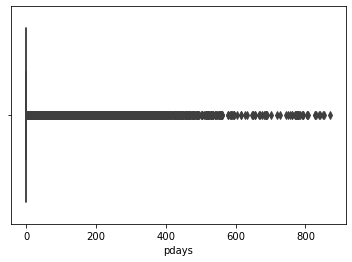

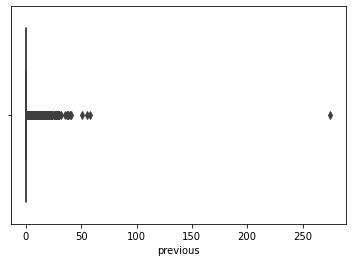

In [63]:
for i in numerical_data.columns:
    sb.boxplot(data_used[i])
    mp.show()

In [64]:
df_numerical_outliers=numerical_data.drop(['age'],1).copy()

In [65]:
df_numerical_outliers.skew()

salary       0.137829
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [ ]:
for col in df_numerical_outliers.columns:
    q1=data_balanced[col].quantile(0.10)
    q3=data_balanced[col].quantile(0.90)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    
    data_balanced[col]=data_balanced[(data_balanced[col]>=ll) & 
                                     (data_balanced[col]<=ul)][col]

In [66]:
for col in df_numerical_outliers.columns:
    q1=data_balanced[col].quantile(0.10)
    q3=data_balanced[col].quantile(0.90)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    
    for ind in data_balanced[col].index:
        if(data_balanced.loc[ind,col]<ll):
            data_balanced.loc[ind,col]=ll
        if(data_balanced.loc[ind,col]>ul):
            data_balanced.loc[ind,col]=ul   

In [101]:
data_balanced[df_numerical_outliers.columns].skew()

salary      0.082489
balance     2.332455
day         0.134366
duration    1.900836
campaign    2.352826
pdays       2.201772
previous    2.367906
dtype: float64

In [67]:
data_balanced.shape

(63875, 22)

The outliers has not been removed but capped out.

We are not going to lose the rows so we are not removing outliers.

**STATISTICAL TEST**

In [68]:
from scipy import stats

**TWO SAMPLE T-TEST (Unpaired)**

In [69]:
pval_num=[]
for i in numerical_data.columns:
    t,pval=stats.ttest_ind(numerical_data[i],data['response'])
    sig_lvl=0.05
    pval_num.append(pval)
    if pval >= sig_lvl:
        print(i)
        print(pval)
        print('H0 is selected,no statistical relationship between columns')
    else:
        print(i)
        print(pval)
        print('Ha is selected,there is statistical relationship between columns')


age
0.0
Ha is selected,there is statistical relationship between columns
salary
0.0
Ha is selected,there is statistical relationship between columns
balance
0.0
Ha is selected,there is statistical relationship between columns
day
0.0
Ha is selected,there is statistical relationship between columns
duration
0.0
Ha is selected,there is statistical relationship between columns
campaign
0.0
Ha is selected,there is statistical relationship between columns
pdays
0.0
Ha is selected,there is statistical relationship between columns
previous
0.0
Ha is selected,there is statistical relationship between columns


In [70]:
df_num_pval=pd.DataFrame({'Features':numerical_data.columns,'Pvalue':pval_num})

In [71]:
df_num_pval

,Features,Pvalue
0,age,0.0
1,salary,0.0
2,balance,0.0
3,day,0.0
4,duration,0.0
5,campaign,0.0
6,pdays,0.0
7,previous,0.0


With this test result we can conclude that all the numerical columns are in statistical relationship with the target column

**CHI SQR TEST (TEST OF INDEPENDENCE)**

In [72]:
pval_list=[]
for i in categorical_data.columns:
    obs=pd.crosstab(data_used[i],data['y'])

    chi_stat,pval,df,exp_tab = stats.chi2_contingency(obs)

    sig_lvl=0.05
    pval_list.append(pval)
    if pval >= sig_lvl:
        print(i)
        print(pval)
        print('H0 is selected,It means there is no relation between those columns')
        print()
    else:
        print(i)
        print(pval)
        print('Ha is selected,It means there is relation between those columns')
        print()

age group
5.8041516974252886e-263
Ha is selected,It means there is relation between those columns

eligible
6.428171811022576e-197
Ha is selected,It means there is relation between those columns

job
3.337121944935502e-172
Ha is selected,It means there is relation between those columns

marital
2.1450999986791792e-43
Ha is selected,It means there is relation between those columns

education
1.6266562124072994e-51
Ha is selected,It means there is relation between those columns

marital-education
1.19863649787742e-80
Ha is selected,It means there is relation between those columns

targeted
1.1526547306046843e-48
Ha is selected,It means there is relation between those columns

default
2.4538606753508344e-06
Ha is selected,It means there is relation between those columns

housing
2.918797605076633e-192
Ha is selected,It means there is relation between those columns

loan
1.665061163492756e-47
Ha is selected,It means there is relation between those columns

contact
1.251738325340638e-225
Ha

In [73]:
df_cat_pval=pd.DataFrame({'Features':categorical_data.columns ,'Pvalue':pval_list})

In [74]:
df_cat_pval

,Features,Pvalue
0,age group,5.804152e-263
1,eligible,6.428172e-197
2,job,3.337122e-172
3,marital,2.145100e-43
4,education,1.626656e-51
5,marital-education,1.198636e-80
6,targeted,1.152655e-48
7,default,2.453861e-06
8,housing,2.918798e-192
9,loan,1.665061e-47


**Assumptions**

Assumption 1 : Independence of error

In [75]:
data_balanced.drop_duplicates(inplace=True)

Assumption 2 - Linearity in the logit for any continuous independent variables

In [76]:
data_balanced[numerical_data.columns]

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143.0,5,261.0,1.0,-1.0,0.0
1,44,60000,29.0,5,151.0,1.0,-1.0,0.0
2,33,120000,2.0,5,76.0,1.0,-1.0,0.0
3,47,20000,1506.0,5,92.0,1.0,-1.0,0.0
4,33,0,1.0,5,198.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...
63870,39,50000,260.0,11,189.0,1.0,109.0,2.0
63871,53,50000,615.0,5,394.0,1.0,176.0,5.0
63872,34,8000,118.0,13,159.0,1.0,-1.0,0.0
63873,48,60000,1070.0,16,168.0,1.0,-1.0,0.0


In [77]:
assumption_continuous=data_balanced[['age','day','duration','campaign','pdays','previous']]

In [78]:
data_balanced=data_balanced.drop(['poutcome'],1)

In [79]:
data_balanced

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,4,1,4,100000,1,2,6,1,0,...,1,0,2,5,8,261.0,1.0,-1.0,0.0,0
1,44,3,1,9,60000,2,1,9,1,0,...,1,0,2,5,8,151.0,1.0,-1.0,0.0,0
2,33,2,1,2,120000,1,1,5,1,0,...,1,1,2,5,8,76.0,1.0,-1.0,0.0,0
3,47,3,1,1,20000,1,3,7,0,0,...,1,0,2,5,8,92.0,1.0,-1.0,0.0,0
4,33,2,1,11,0,2,3,11,0,0,...,0,0,2,5,8,198.0,1.0,-1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63870,39,2,1,0,50000,1,1,5,1,0,...,1,0,0,11,3,189.0,1.0,109.0,2.0,1
63871,53,3,1,0,50000,1,1,5,1,0,...,0,0,0,5,4,394.0,1.0,176.0,5.0,1
63872,34,2,1,10,8000,1,1,8,1,0,...,0,0,0,13,8,159.0,1.0,-1.0,0.0,1
63873,48,3,1,9,60000,1,1,5,1,0,...,0,0,0,16,5,168.0,1.0,-1.0,0.0,1


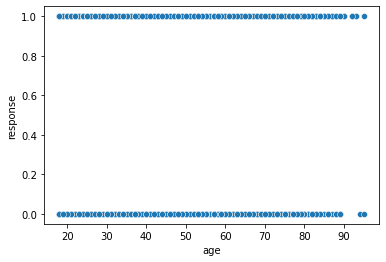

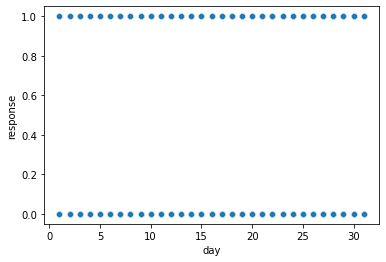

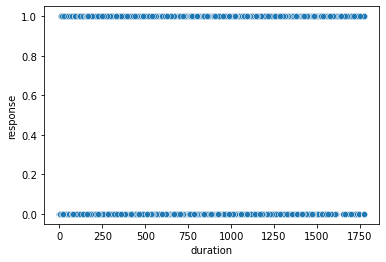

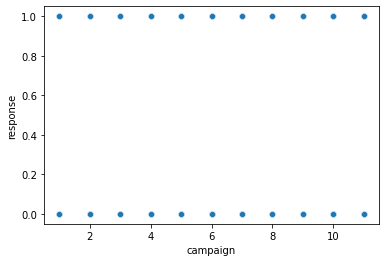

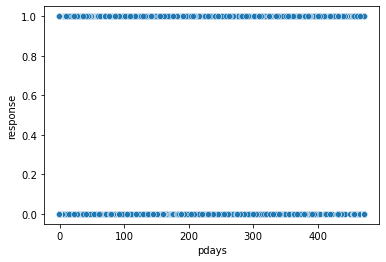

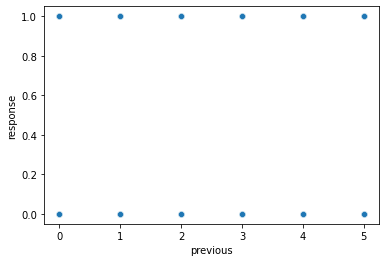

In [80]:
for i in assumption_continuous.columns:
    sb.scatterplot(assumption_continuous[i],data_balanced['response'])
    mp.show()

Assumption 3 - Absence of multicollinearity

<AxesSubplot:>

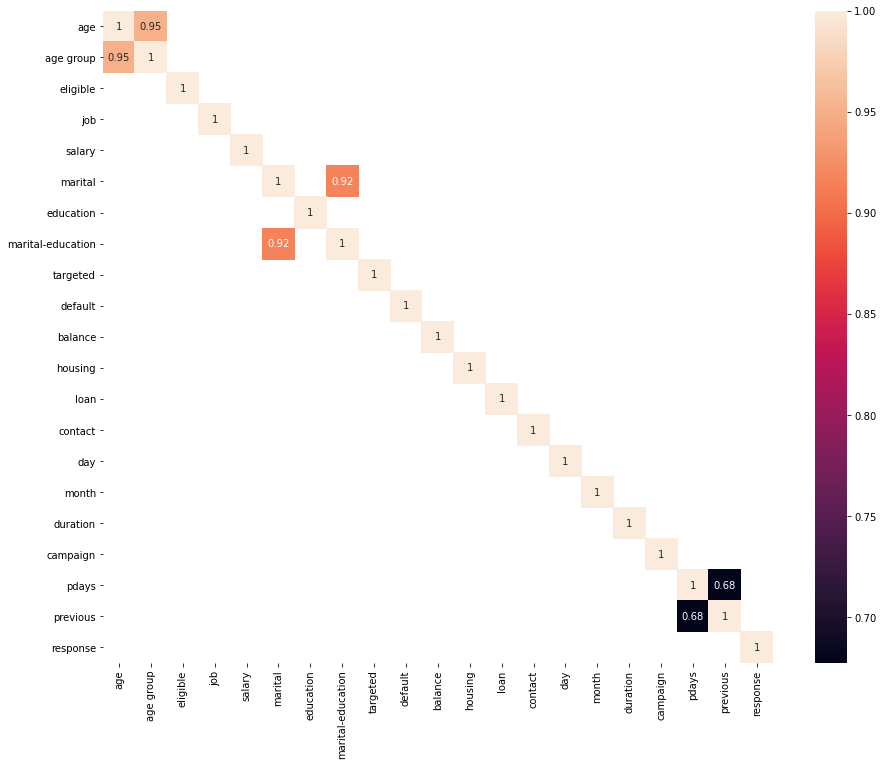

In [81]:
mp.figure(figsize=(15,12))
sb.heatmap(data_balanced.corr()[np.abs(data_balanced.corr())>0.6],annot=True)

In [82]:
data_balanced.drop(['age','marital-education'],1,inplace=True)

In [83]:
#The highly multicollineared columns have been removed

Assumption 4 - lack of strongly influential outliers

In [84]:
# Potential outliers are removed

**Scaling**

In [85]:
numerical_data.drop(['age'],1,inplace=True)

In [86]:
from scipy.stats import zscore

In [87]:
data_balanced[numerical_data.columns]=(data_balanced[numerical_data.columns]).apply(zscore)

In [88]:
data_balanced

,age group,eligible,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,4,1,4,1.321012,1,2,1,0,0.388447,1,0,2,-1.313504,8,-0.237613,-0.66928,-0.476238,-0.453798,0
1,3,1,9,0.076247,2,1,1,0,-0.631032,1,0,2,-1.313504,8,-0.593305,-0.66928,-0.476238,-0.453798,0
2,2,1,2,1.943394,1,1,1,0,-0.644053,1,1,2,-1.313504,8,-0.835821,-0.66928,-0.476238,-0.453798,0
3,3,1,1,-1.168518,1,3,0,0,0.081253,1,0,2,-1.313504,8,-0.784084,-0.66928,-0.476238,-0.453798,0
4,2,1,11,-1.790901,2,3,0,0,-0.644535,0,0,2,-1.313504,8,-0.441327,-0.66928,-0.476238,-0.453798,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63870,2,1,0,-0.234945,1,1,1,0,-0.519632,1,0,0,-0.560755,3,-0.470429,-0.66928,0.626915,1.134033,1
63871,3,1,0,-0.234945,1,1,1,0,-0.348433,0,0,0,-1.313504,4,0.192450,-0.66928,1.298835,3.515780,1
63872,2,1,10,-1.541948,1,1,1,0,-0.588112,0,0,0,-0.309839,8,-0.567436,-0.66928,-0.476238,-0.453798,1
63873,3,1,9,0.076247,1,1,1,0,-0.129009,0,0,0,0.066536,5,-0.538334,-0.66928,-0.476238,-0.453798,1


**BASE MODEL**

In [89]:
x=data_balanced.drop(['response'],1)
y=data_balanced['response']

In [90]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(x,y,test_size=0.2,random_state=52)

In [91]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression=LogisticRegression()

In [92]:
Logistic_Regression.fit(xtr,ytr)

LogisticRegression()

In [93]:
ypred=Logistic_Regression.predict(xt)

In [94]:
yproba=Logistic_Regression.predict_proba(xt)[:,1]

In [95]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [96]:
print(classification_report(yt,ypred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7966
           1       0.82      0.79      0.81      4785

    accuracy                           0.86     12751
   macro avg       0.85      0.85      0.85     12751
weighted avg       0.86      0.86      0.86     12751



In [97]:
confusion_matrix(yt,ypred)

array([[7154,  812],
       [ 989, 3796]], dtype=int64)

In [98]:
roc_auc_score(yt,yproba)

0.9289393716398141

Recall Score of 1 (ie):- Sensitivity should be increased

In [99]:
data_balanced.to_csv('BANKMARKETING_NEW.csv',index=None)